## Setup and imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

sns.set(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (10, 5)


## save figure to ./report/images

In [139]:
import os

IMAGE_DIR = "../report/images"
os.makedirs(IMAGE_DIR, exist_ok=True)

def savefig(name):
    path = os.path.join(IMAGE_DIR, name)
    plt.savefig(path, bbox_inches="tight", dpi=300)

## Load dataset

In [ ]:
FILE_PATH = "../data/dataset.xlsx"

df_raw = pd.read_excel(FILE_PATH)
print("Raw shape:", df_raw.shape)
df_raw.head()

Raw shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Cleaning

In [ ]:
df = df_raw.copy()
df.columns = [c.strip() for c in df.columns]
df = df[~df["Description"].isna()]
df = df[~df["CustomerID"].isna()]
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["TotalAmount"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## Dataset overview

In [ ]:
print("Date range:", df["InvoiceDate"].min(), "→", df["InvoiceDate"].max())
print("Invoices:", df["InvoiceNo"].nunique())
print("Customers:", df["CustomerID"].nunique())
print("Countries:", df["Country"].nunique())
print("Products:", df["Description"].nunique())
df.describe(include="all").transpose().head(20)

Date range: 2010-12-01 08:26:00 → 2011-12-09 12:50:00
Invoices: 18532
Customers: 4338
Countries: 37
Products: 3877


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
InvoiceNo,397884.0,18532.0,576339.0,542.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,397884,3665,85123A,2035,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,397884,3877,WHITE HANGING HEART T-LIGHT HOLDER,2028,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,397884.0,NaN,NaN,NaN,12.988238,1.0,2.0,6.0,12.0,80995.0,179.331775
InvoiceDate,397884,NaN,NaN,NaN,2011-07-10 23:41:23.511023360,2010-12-01 08:26:00,2011-04-07 11:12:00,2011-07-31 14:39:00,2011-10-20 14:33:00,2011-12-09 12:50:00,NaN
UnitPrice,397884.0,NaN,NaN,NaN,3.116488,0.001,1.25,1.95,3.75,8142.75,22.097877
CustomerID,397884.0,NaN,NaN,NaN,15294.423453,12346.0,13969.0,15159.0,16795.0,18287.0,1713.14156
Country,397884,37,United Kingdom,354321,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalAmount,397884.0,NaN,NaN,NaN,22.397,0.001,4.68,11.8,19.8,168469.6,309.071041


## EDA: distributions and top products

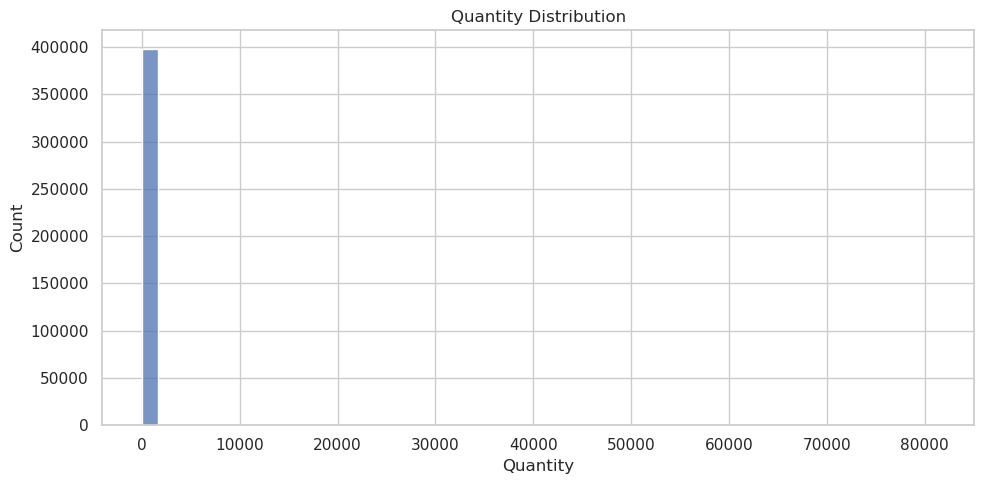

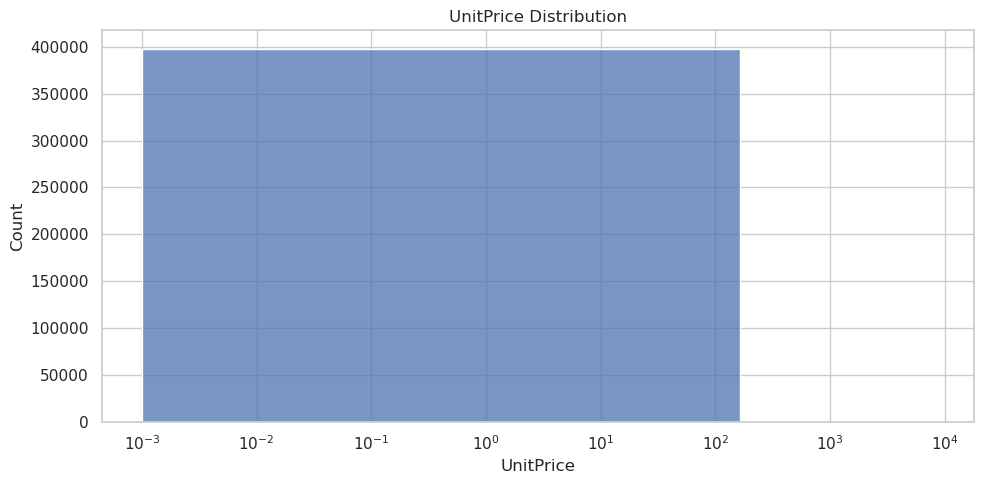

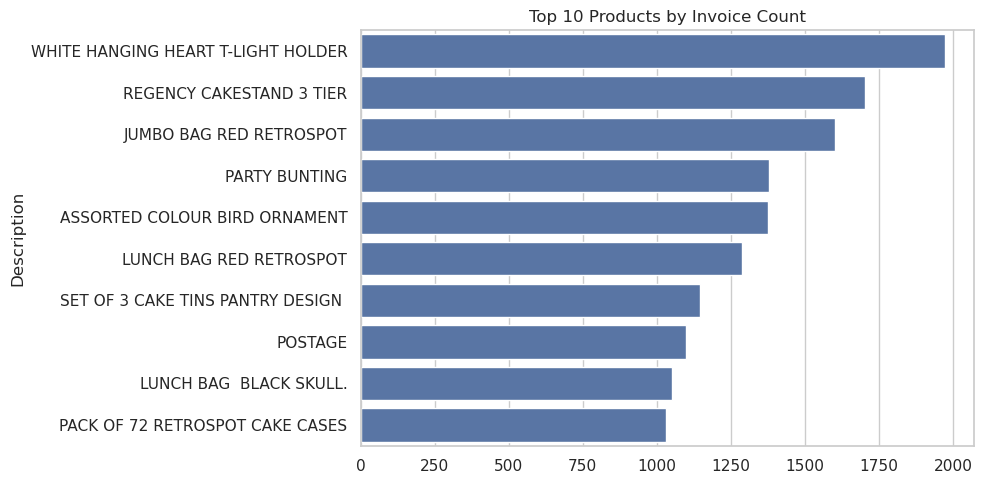

In [141]:
sns.histplot(df["Quantity"], bins=50)
plt.title("Quantity Distribution")
savefig("quantity_distribution.png")
plt.tight_layout()
plt.show()

sns.histplot(df["UnitPrice"], bins=50)
plt.xscale("log")
plt.title("UnitPrice Distribution")
savefig("unitprice_distribution.png")
plt.tight_layout()
plt.show()

top_products = df.groupby("Description")["InvoiceNo"].nunique().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Products by Invoice Count")
savefig("top10_products.png")
plt.tight_layout()
plt.show()

## EDA: sales by country

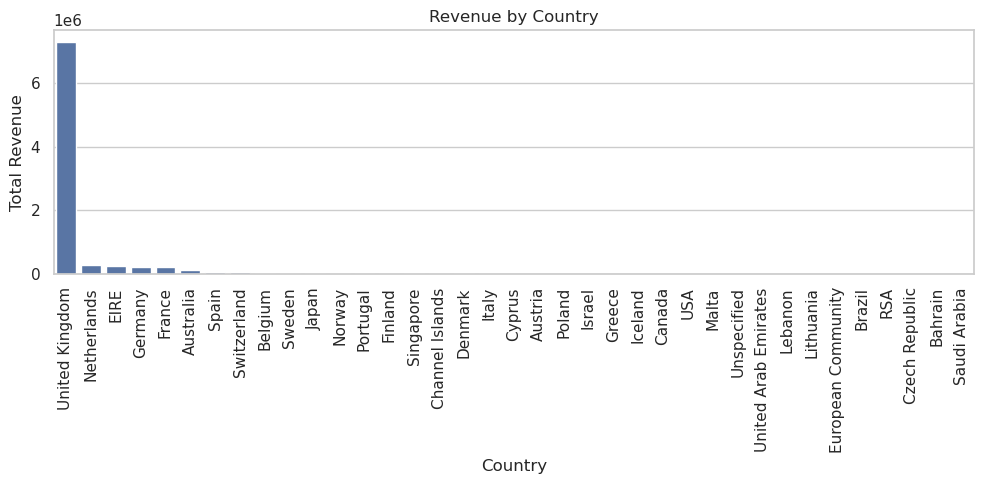

In [142]:
country_revenue = df.groupby("Country")["TotalAmount"].sum().sort_values(ascending=False)
sns.barplot(x=country_revenue.index, y=country_revenue.values)
plt.xticks(rotation=90)
plt.title("Revenue by Country")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
savefig("revenue_by_country.png")
plt.tight_layout()
plt.show()

## Preprocessing for association rule mining

In [ ]:
min_item_freq = 50
top_k = 50
item_counts = df["Description"].value_counts()
frequent_items = item_counts[item_counts >= min_item_freq].head(top_k).index
df_ar = df[df["Description"].isin(frequent_items)].copy()
basket = df_ar.groupby(["InvoiceNo", "Description"])["Quantity"].sum().unstack().fillna(0)
basket_binary = (basket > 0).astype(int)
print("Invoices:", basket_binary.shape[0])
print("Products:", basket_binary.shape[1])
basket_binary.head()

Invoices: 13576
Products: 50


Description,6 RIBBONS RUSTIC CHARM,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE RED,ASSORTED COLOUR BIRD ORNAMENT,BAKING SET 9 PIECE RETROSPOT,GARDENERS KNEELING PAD KEEP CALM,HEART OF WICKER LARGE,HEART OF WICKER SMALL,HOT WATER BOTTLE KEEP CALM,JAM MAKING SET PRINTED,...,SET OF 4 PANTRY JELLY MOULDS,SET/20 RED RETROSPOT PAPER NAPKINS,SET/5 RED RETROSPOT LID GLASS BOWLS,SPACEBOY LUNCH BOX,SPOTTY BUNTING,VICTORIAN GLASS HANGING T-LIGHT,VINTAGE SNAP CARDS,WHITE HANGING HEART T-LIGHT HOLDER,WOODEN FRAME ANTIQUE WHITE,WOODEN PICTURE FRAME WHITE FINISH
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
536367,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
536371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## EDA for association rules

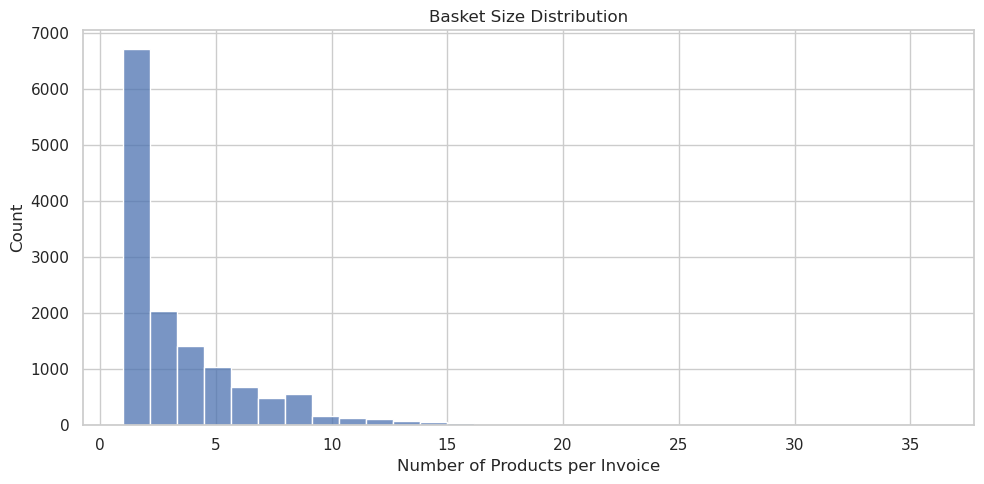

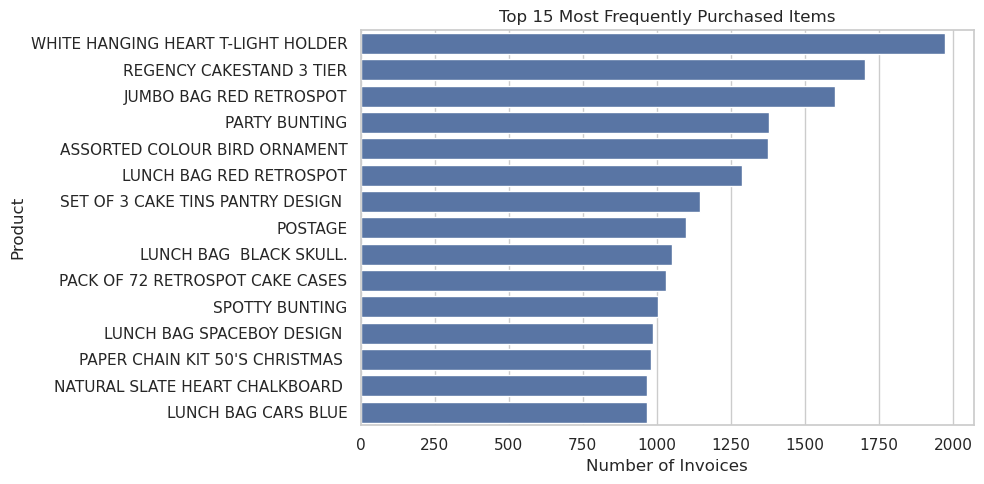

In [143]:
basket_sizes = basket_binary.sum(axis=1)
sns.histplot(basket_sizes, bins=30)
plt.title("Basket Size Distribution")
plt.xlabel("Number of Products per Invoice")
plt.ylabel("Count")
savefig("basket_size_distribution.png")
plt.tight_layout()
plt.show()

item_frequency = basket_binary.sum(axis=0).sort_values(ascending=False).head(15)
sns.barplot(x=item_frequency.values, y=item_frequency.index)
plt.title("Top 15 Most Frequently Purchased Items")
plt.xlabel("Number of Invoices")
plt.ylabel("Product")
savefig("top15_items.png")
plt.tight_layout()
plt.show()

## Apriori frequent itemsets and rules

In [ ]:
def manual_frequent_itemsets_pairs(data, min_support=0.01):
    B = data.values.astype(bool)
    n_rows, n_items = B.shape
    labels = list(data.columns)
    supports = {}
    frequent_itemsets = []

    singleton_supports = B.mean(axis=0)
    for idx, supp in enumerate(singleton_supports):
        if supp >= min_support:
            fs = frozenset([labels[idx]])
            supports[fs] = supp
            frequent_itemsets.append((fs, supp))

    for i in range(n_items):
        for j in range(i + 1, n_items):
            supp_ij = np.logical_and(B[:, i], B[:, j]).mean()
            if supp_ij >= min_support:
                fs = frozenset([labels[i], labels[j]])
                supports[fs] = supp_ij
                frequent_itemsets.append((fs, supp_ij))

    return frequent_itemsets, supports

def manual_generate_rules(frequent_itemsets, support_dict, min_confidence=0.3):
    rows = []
    for fs, supp in frequent_itemsets:
        if len(fs) < 2:
            continue
        items = list(fs)
        for r in range(1, len(items)):
            for antecedent_tuple in combinations(items, r):
                antecedent = frozenset(antecedent_tuple)
                consequent = fs - antecedent
                supp_a = support_dict.get(antecedent, 0)
                supp_b = support_dict.get(consequent, 0)
                if supp_a == 0 or supp_b == 0:
                    continue
                confidence = supp / supp_a
                lift = confidence / supp_b
                if confidence >= min_confidence:
                    rows.append({
                        "antecedent": antecedent,
                        "consequent": consequent,
                        "support": supp,
                        "confidence": confidence,
                        "lift": lift
                    })
    if not rows:
        return pd.DataFrame(columns=["antecedent","consequent","support","confidence","lift"])
    return pd.DataFrame(rows)

frequent_itemsets, support_dict = manual_frequent_itemsets_pairs(
    basket_binary,
    min_support=0.01
)
print("Number of frequent itemsets:", len(frequent_itemsets))

rules_df = manual_generate_rules(
    frequent_itemsets,
    support_dict,
    min_confidence=0.3
)
rules_df = rules_df.sort_values("lift", ascending=False)
print("Number of rules:", len(rules_df))
rules_df.head()

Number of frequent itemsets: 243
Number of rules: 96


,antecedent,consequent,support,confidence,lift
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.039039,0.671736,10.398510
0,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.039039,0.604333,10.398510
94,(WOODEN FRAME ANTIQUE WHITE ),(WOODEN PICTURE FRAME WHITE FINISH),0.034473,0.577065,8.943195
95,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE ),0.034473,0.534247,8.943195
2,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.029979,0.423517,7.178114


## Top rules table

In [ ]:
top_10_rules = rules_df.head(10).copy()
top_10_rules["antecedent_str"] = top_10_rules["antecedent"].apply(lambda x: ", ".join(list(x)))
top_10_rules["consequent_str"] = top_10_rules["consequent"].apply(lambda x: ", ".join(list(x)))
top_10_rules[["antecedent_str","consequent_str","support","confidence","lift"]]

,antecedent_str,consequent_str,support,confidence,lift
1,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE RED,0.039039,0.671736,10.398510
0,ALARM CLOCK BAKELIKE RED,ALARM CLOCK BAKELIKE GREEN,0.039039,0.604333,10.398510
94,WOODEN FRAME ANTIQUE WHITE,WOODEN PICTURE FRAME WHITE FINISH,0.034473,0.577065,8.943195
95,WOODEN PICTURE FRAME WHITE FINISH,WOODEN FRAME ANTIQUE WHITE,0.034473,0.534247,8.943195
2,HEART OF WICKER SMALL,HEART OF WICKER LARGE,0.029979,0.423517,7.178114
3,HEART OF WICKER LARGE,HEART OF WICKER SMALL,0.029979,0.508115,7.178114
8,JUMBO BAG APPLES,JUMBO BAG ALPHABET,0.020404,0.385794,6.964811
7,JUMBO BAG ALPHABET,JUMBO BAG APPLES,0.020404,0.368351,6.964811
15,JUMBO BAG VINTAGE LEAF,JUMBO BAG APPLES,0.020919,0.367876,6.955821
14,JUMBO BAG APPLES,JUMBO BAG VINTAGE LEAF,0.020919,0.395543,6.955821


## Scatter plot of support - confidenc

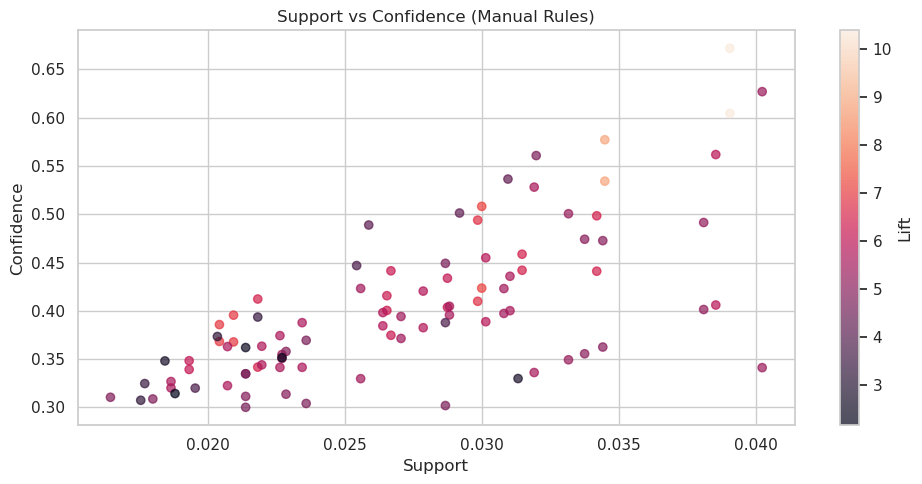

In [144]:
plt.scatter(
    rules_df["support"],
    rules_df["confidence"],
    c=rules_df["lift"],
    alpha=0.7
)
plt.colorbar(label="Lift")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support vs Confidence (Manual Rules)")
savefig("rules_scatter.png")
plt.tight_layout()
plt.show()

## Daily revenue series

In [ ]:
daily_revenue = df.set_index("InvoiceDate").resample("D")["TotalAmount"].sum().to_frame("Revenue")
print("Number of days:", len(daily_revenue))
daily_revenue.head()

Number of days: 374


,Revenue
InvoiceDate,
2010-12-01,46376.49
2010-12-02,47316.53
2010-12-03,23921.71
2010-12-04,0.00
2010-12-05,31771.60


## Time serie EDA

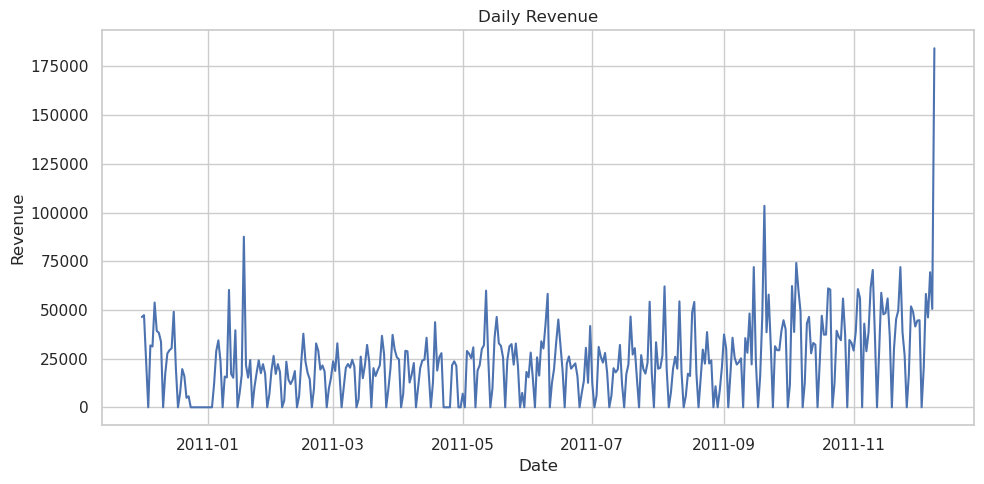

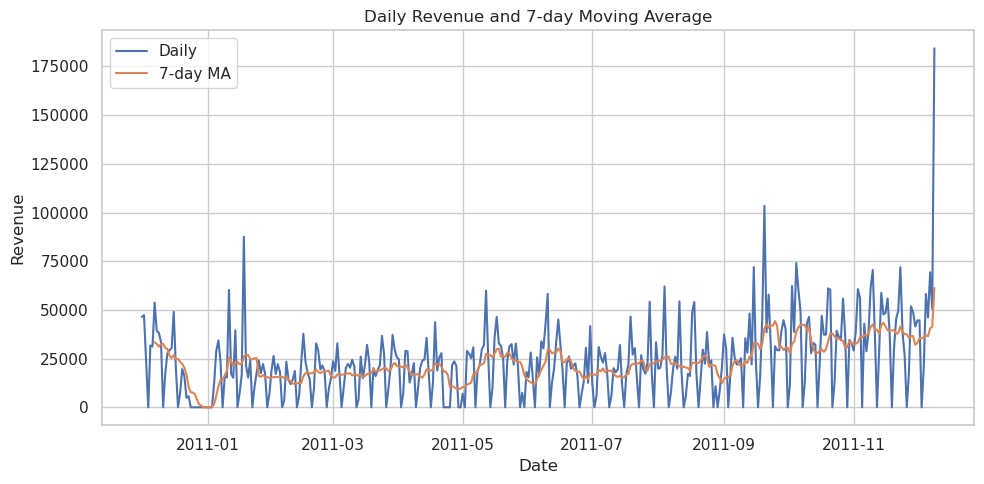

In [145]:
plt.plot(daily_revenue.index, daily_revenue["Revenue"])
plt.title("Daily Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue")
savefig("daily_revenue.png")
plt.tight_layout()
plt.show()

daily_revenue["Revenue_MA7"] = daily_revenue["Revenue"].rolling(7).mean()
plt.plot(daily_revenue.index, daily_revenue["Revenue"], label="Daily")
plt.plot(daily_revenue.index, daily_revenue["Revenue_MA7"], label="7-day MA")
plt.title("Daily Revenue and 7-day Moving Average")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
savefig("daily_revenue_ma7.png")
plt.tight_layout()
plt.show()

## Train/test split for time series

In [ ]:
ts = daily_revenue[["Revenue"]].copy()
n = len(ts)
train_size = int(0.8 * n)
train = ts.iloc[:train_size]
test = ts.iloc[train_size:]
print("Train days:", len(train))
print("Test days:", len(test))
train.tail(), test.head()

Train days: 299
Test days: 75


(               Revenue
 InvoiceDate           
 2011-09-21   38503.060
 2011-09-22   57869.360
 2011-09-23   31781.100
 2011-09-24       0.000
 2011-09-25   31372.661,
                Revenue
 InvoiceDate           
 2011-09-26   29329.841
 2011-09-27   29274.360
 2011-09-28   39057.890
 2011-09-29   44729.370
 2011-09-30   40033.440)

## Simple Exponential Smoothing

In [ ]:
def simple_exponential_smoothing(y, alpha):
    y = np.asarray(y, dtype=float)
    s = np.zeros_like(y)
    s[0] = y[0]
    for t in range(1, len(y)):
        s[t] = alpha * y[t] + (1.0 - alpha) * s[t - 1]
    return s

alpha = 0.3
train_values = train["Revenue"].values
fitted_train = simple_exponential_smoothing(train_values, alpha)
last_level = fitted_train[-1]
y_pred_ses = np.full(shape=len(test), fill_value=last_level)

fitted_train_series = pd.Series(fitted_train, index=train.index)
y_pred_ses_series = pd.Series(y_pred_ses, index=test.index)

fitted_train_series.head(), y_pred_ses_series.head()

(InvoiceDate
 2010-12-01    46376.490000
 2010-12-02    46658.502000
 2010-12-03    39837.464400
 2010-12-04    27886.225080
 2010-12-05    29051.837556
 Freq: D, dtype: float64,
 InvoiceDate
 2011-09-26    31515.433323
 2011-09-27    31515.433323
 2011-09-28    31515.433323
 2011-09-29    31515.433323
 2011-09-30    31515.433323
 Freq: D, dtype: float64)

## Error metrics

In [ ]:
def mae(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred))

def rmse(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def mape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    non_zero = y_true != 0
    if non_zero.sum() == 0:
        return np.nan
    return np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100.0

y_test = test["Revenue"]
mae_ses = mae(y_test, y_pred_ses_series)
rmse_ses = rmse(y_test, y_pred_ses_series)
mape_ses = mape(y_test, y_pred_ses_series)

print("SES MAE :", round(mae_ses, 2))
print("SES RMSE:", round(rmse_ses, 2))
print("SES MAPE:", round(mape_ses, 2), "%")

SES MAE : 18656.55
SES RMSE: 26932.2
SES MAPE: 36.26 %


## Actual - predicted on test data

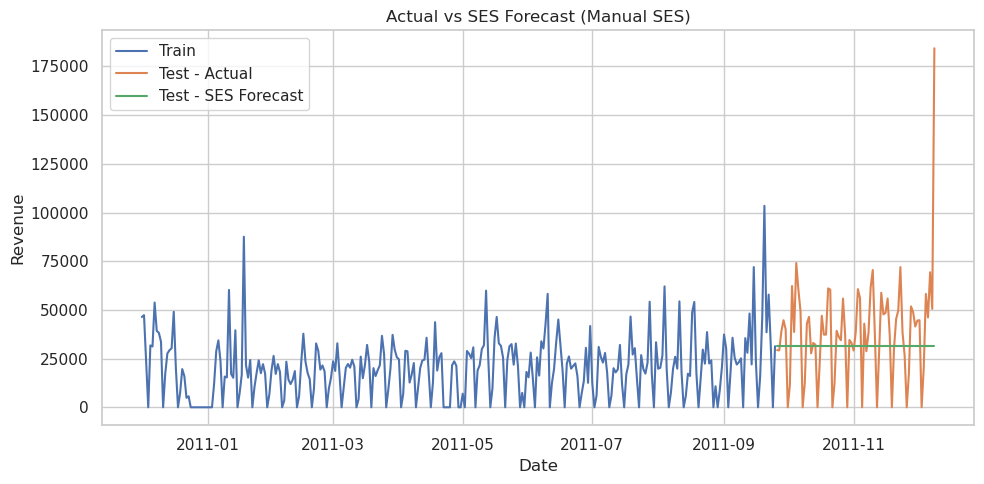

In [146]:
plt.plot(train.index, train["Revenue"], label="Train")
plt.plot(test.index, test["Revenue"], label="Test - Actual")
plt.plot(test.index, y_pred_ses_series, label="Test - SES Forecast")
plt.title("Actual vs SES Forecast (Manual SES)")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
savefig("ses_vs_actual.png")
plt.tight_layout()
plt.show()

## Naive baseline comparison

Naive MAE : 20797.22
Naive RMSE: 28712.82
Naive MAPE: 41.94 %


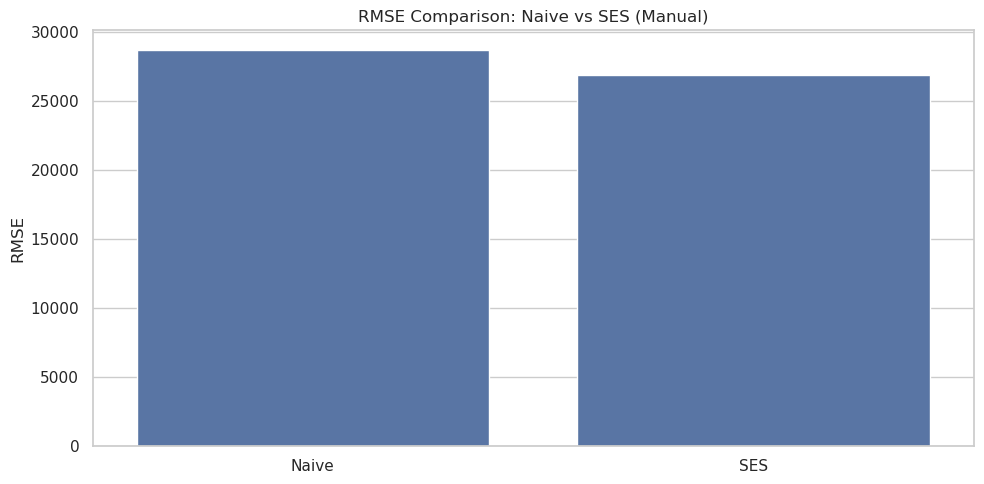

In [147]:
y_train = train["Revenue"]
y_naive = y_test.shift(1).copy()
y_naive.iloc[0] = y_train.iloc[-1]

mae_naive = mae(y_test, y_naive)
rmse_naive = rmse(y_test, y_naive)
mape_naive = mape(y_test, y_naive)

print("Naive MAE :", round(mae_naive, 2))
print("Naive RMSE:", round(rmse_naive, 2))
print("Naive MAPE:", round(mape_naive, 2), "%")

methods = ["Naive", "SES"]
rmse_values = [rmse_naive, rmse_ses]

sns.barplot(x=methods, y=rmse_values)
plt.title("RMSE Comparison: Naive vs SES (Manual)")
plt.ylabel("RMSE")
savefig("rmse_comparison.png")
plt.tight_layout()
plt.show()

## Forecast next 14 days with manual SES

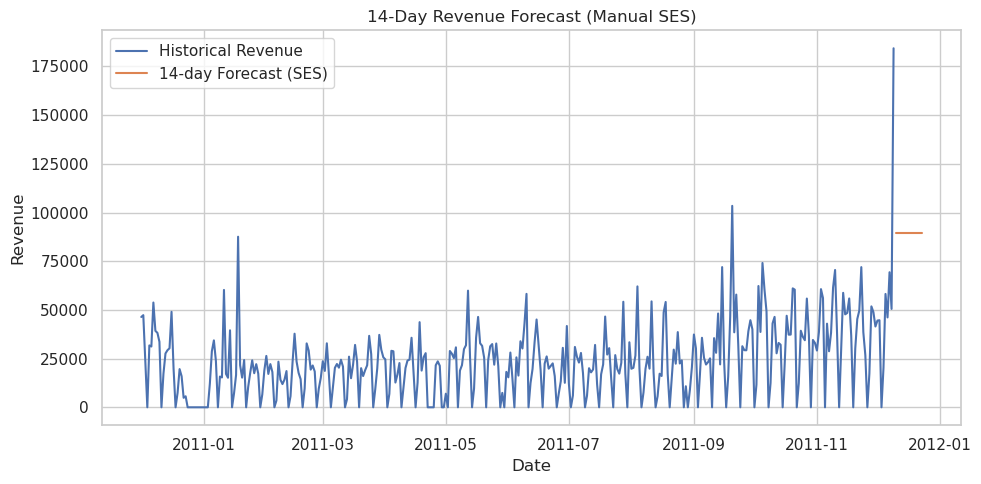

,SES_Forecast_Revenue
2011-12-10,89520.069104
2011-12-11,89520.069104
2011-12-12,89520.069104
2011-12-13,89520.069104
2011-12-14,89520.069104
2011-12-15,89520.069104
2011-12-16,89520.069104
2011-12-17,89520.069104
2011-12-18,89520.069104
2011-12-19,89520.069104


In [148]:
full_values = ts["Revenue"].values
fitted_full = simple_exponential_smoothing(full_values, alpha)
last_level_full = fitted_full[-1]

future_index = pd.date_range(start=ts.index[-1] + pd.Timedelta(days=1), periods=14, freq="D")
forecast_14 = pd.Series(np.full(14, last_level_full), index=future_index)

plt.plot(ts.index, ts["Revenue"], label="Historical Revenue")
plt.plot(forecast_14.index, forecast_14.values, label="14-day Forecast (SES)")
plt.title("14-Day Revenue Forecast (Manual SES)")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
savefig("ses_14day_forecast.png")
plt.tight_layout()
plt.show()

forecast_14.to_frame(name="SES_Forecast_Revenue")